In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [5]:
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

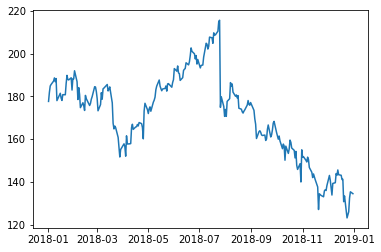

In [6]:
plt.plot(fb.index, fb.open)

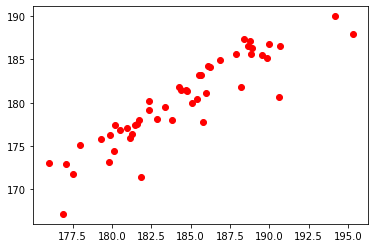

In [8]:
plt.plot('high', 'low', 'or', data=fb.head(50))

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

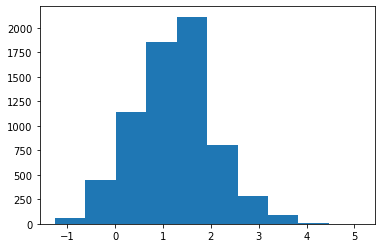

In [11]:
quakes = pd.read_csv('earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

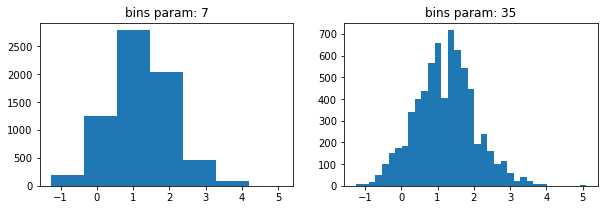

In [12]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for ax, bins in zip(axes, [7, 35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'bins param: {bins}')

In [13]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

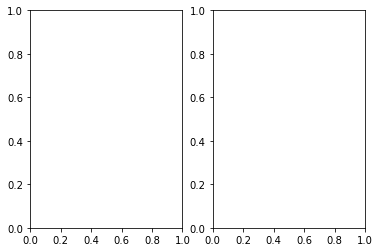

In [15]:
fig, axes = plt.subplots(1, 2)

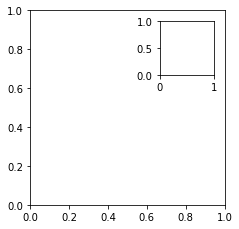

In [16]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

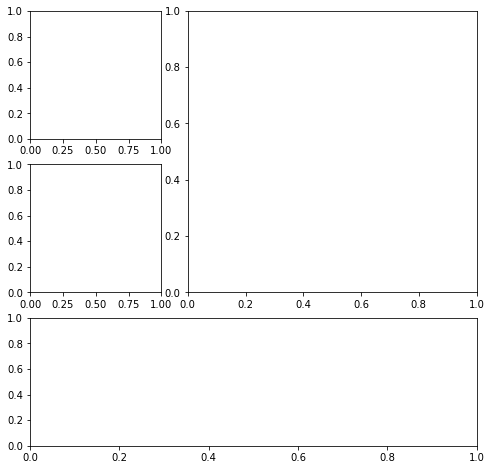

In [17]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2, :])

In [18]:
plt.close('all')

<Figure size 720x288 with 0 Axes>

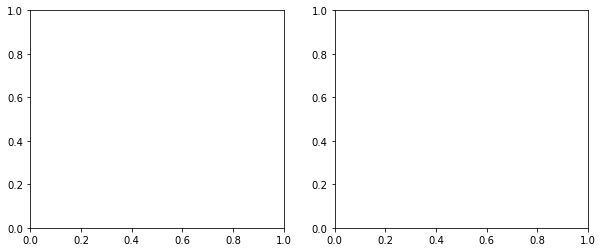

In [19]:
fig = plt.figure(figsize=(10, 4))
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

In [22]:
import random
import matplotlib as mpl

rcparams_list = list(mpl.rcParams.keys())
random.seed(20)
random.shuffle(rcparams_list)

sorted(rcparams_list[:20])

['axes.formatter.limits',
 'axes.formatter.use_locale',
 'boxplot.whiskerprops.linestyle',
 'contour.negative_linestyle',
 'date.autoformatter.year',
 'legend.labelspacing',
 'lines.dashed_pattern',
 'lines.dotted_pattern',
 'lines.scale_dashes',
 'lines.solid_capstyle',
 'lines.solid_joinstyle',
 'patch.antialiased',
 'path.simplify',
 'pdf.inheritcolor',
 'savefig.orientation',
 'svg.hashsalt',
 'timezone',
 'webagg.open_in_browser',
 'ytick.labelright',
 'ytick.minor.size']

In [23]:
mpl.rcParams['figure.figsize']

[6.0, 4.0]

In [24]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

In [25]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [26]:
plt.rc('figure', figsize=(20, 20))
plt.rcdefaults()

In [27]:
import numpy as np

covid = pd.read_csv('covid19_cases.csv').assign(date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')).set_index('date').replace('United_States_of_America', 'USA').sort_index()['2020-01-18':'2020-09-18']

<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

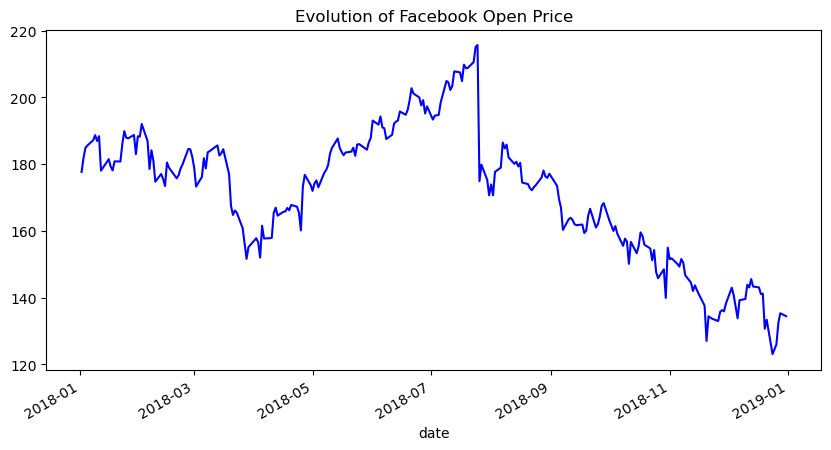

In [30]:
fb.plot(kind='line', y='open', figsize=(10, 5), style='-b', legend=False, title="Evolution of Facebook Open Price")

<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

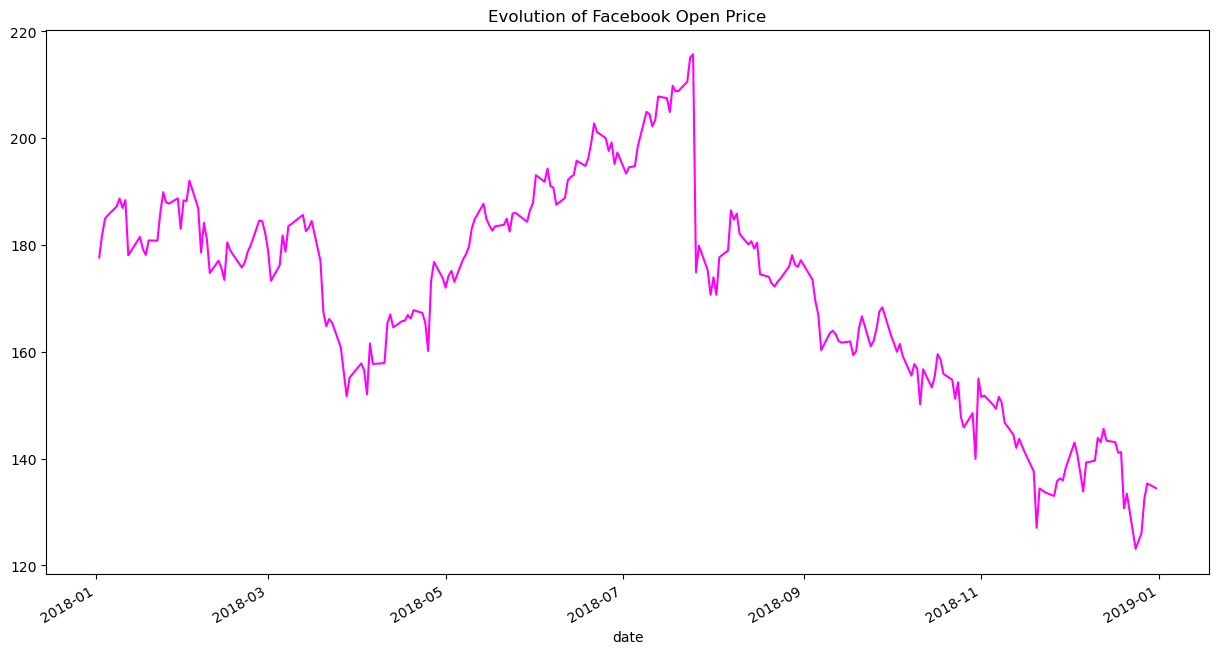

In [31]:
fb.plot(kind='line', y='open', figsize=(15, 8), color='magenta', linestyle='solid', legend=False, title='Evolution of Facebook Open Price')

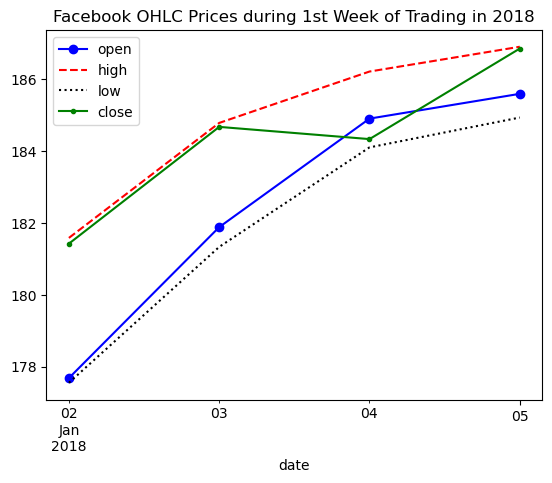

In [32]:
fb.first('1W').plot(
    y = ['open', 'high', 'low', 'close'],
    style=['o-b', '--r', ':k', '.-g'], 
    title = 'Facebook OHLC Prices during 1st Week of Trading in 2018'
).autoscale()

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

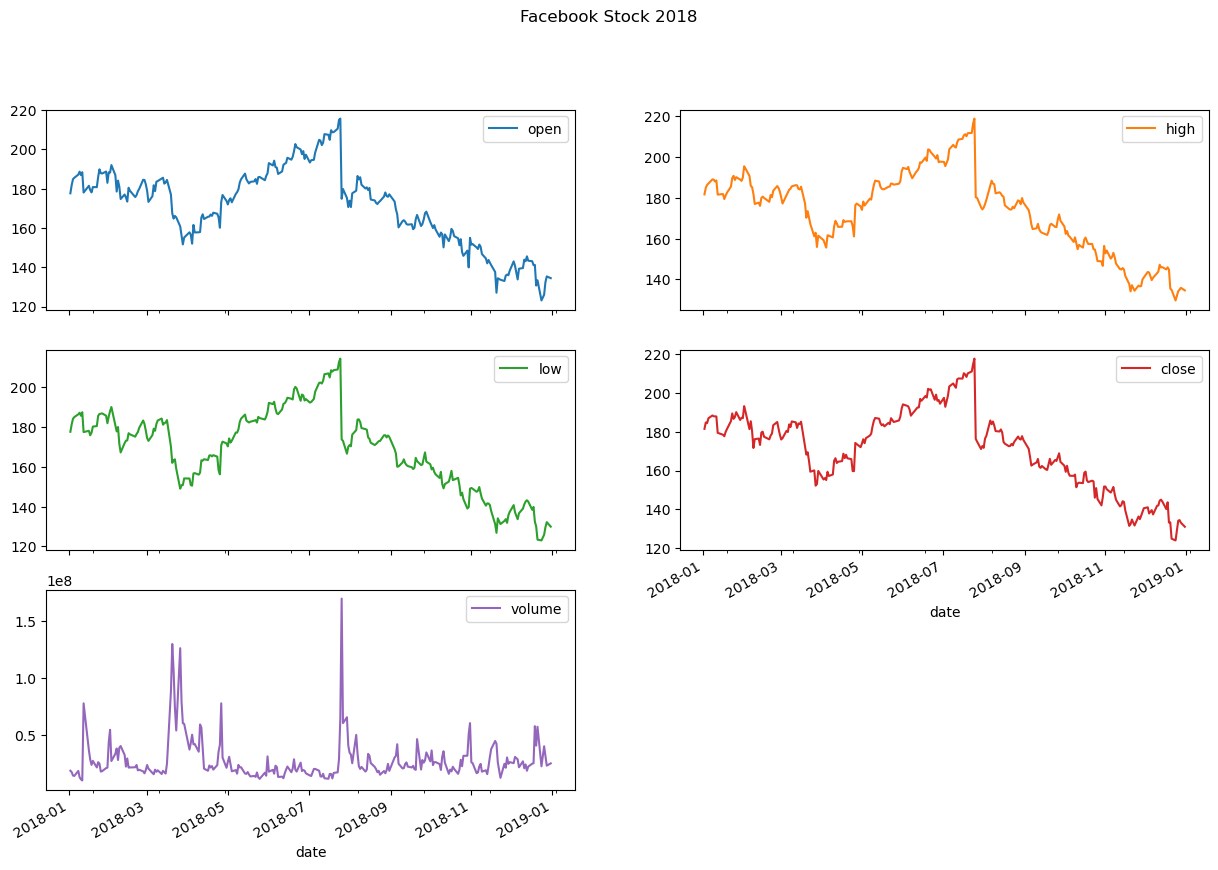

In [37]:
fb.plot(kind='line', subplots=True, layout=(3, 2), figsize=(15, 10), title="Facebook Stock 2018")

In [38]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index,
    columns='countriesAndTerritories',
    values='cases'
).rolling(7).mean()

<AxesSubplot:xlabel='date'>

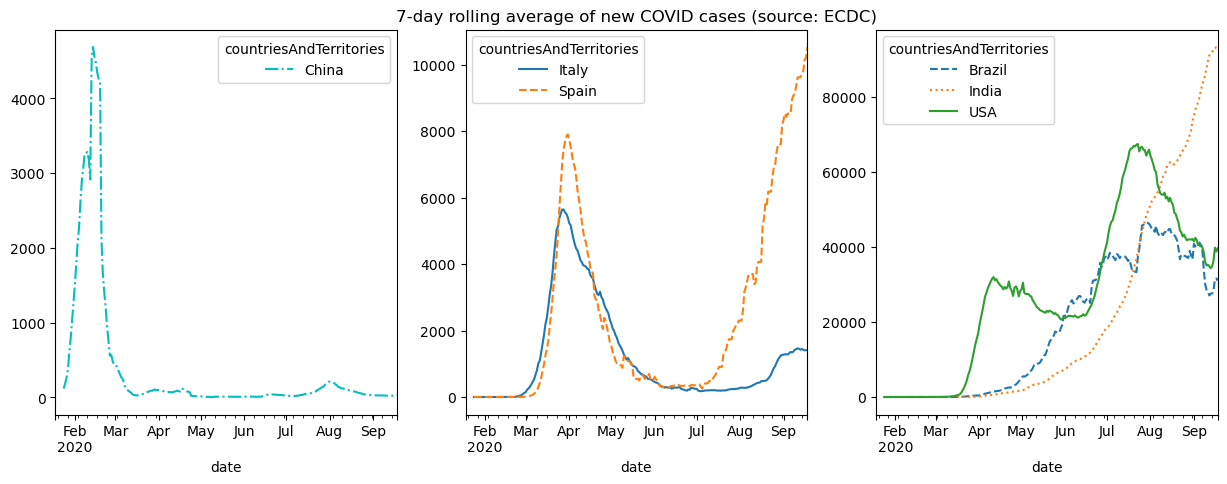

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax = axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(ax=axes[1], style=['-', '--'], title='7-day rolling average of new COVID cases (source: ECDC)')
new_cases_rolling_average[['Brazil', 'India', 'USA']].plot(ax=axes[2], style=['--', ':', '-'])

<AxesSubplot:title={'center':'7-day rolling average of new COVID-19 cases\n(source: ECDC)'}, xlabel='date'>

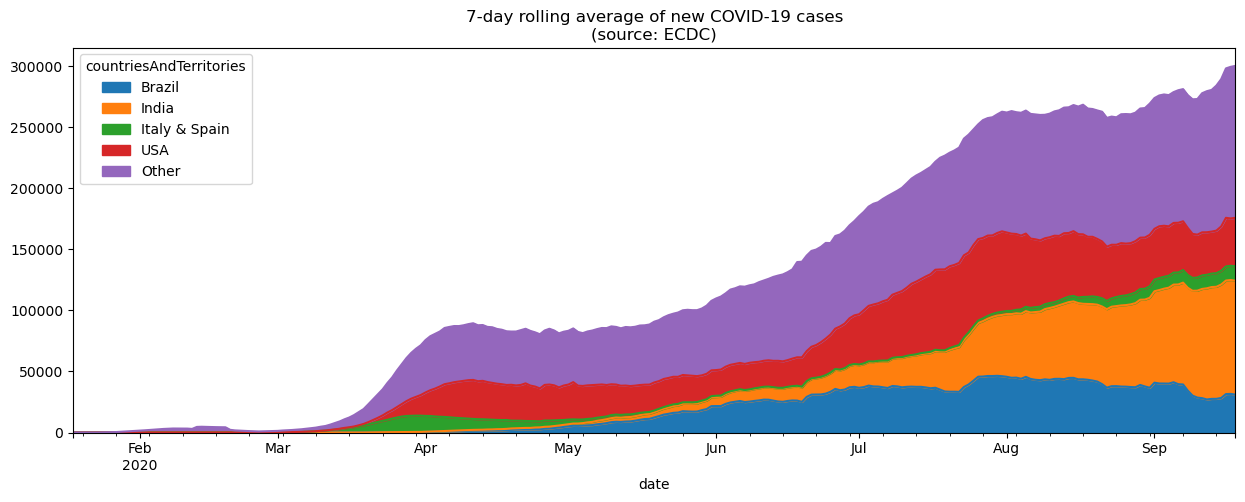

In [43]:
cols = [col for col in new_cases_rolling_average.columns if col not in ['USA', 'Brazil', 'India', 'Italy & Spain']]
new_cases_rolling_average.assign(**{'Italy & Spain': lambda x: x.Italy + x.Spain}).sort_index(axis=1).assign(Other=lambda x: x[cols].sum(axis=1)).drop(columns=cols).plot(kind='area', figsize=(15, 5),title='7-day rolling average of new ''COVID-19 cases\n(source: ECDC)')

<AxesSubplot:xlabel='date'>

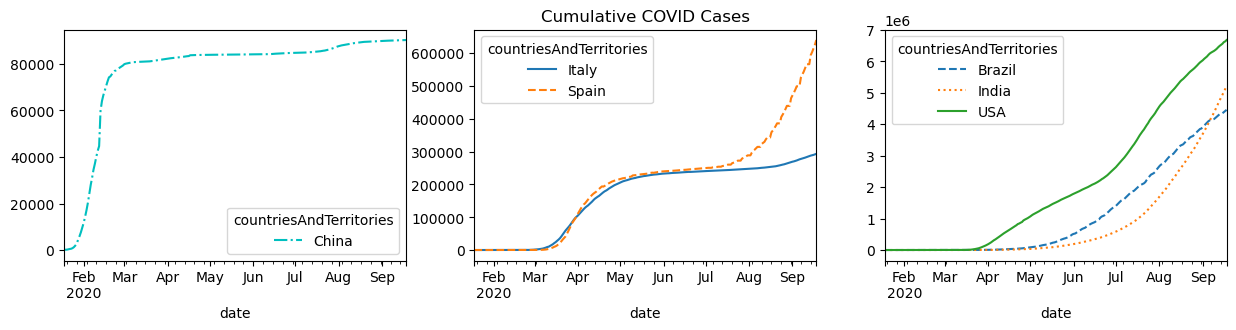

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

cumulative_covid_cases = covid.groupby(['countriesAndTerritories', pd.Grouper(freq='1D')]).cases.sum().unstack(0).apply('cumsum')

cumulative_covid_cases[['China']].plot(ax=axes[0], style='-.c')
cumulative_covid_cases[['Italy', 'Spain']].plot(ax=axes[1], style=['-', '--'], title='Cumulative COVID Cases')
cumulative_covid_cases[['Brazil', 'India', 'USA']].plot(ax=axes[2], style=['--', ':', '-'])


<AxesSubplot:title={'center':'Facebook Daily High - Low vs. Volume Traded'}, xlabel='volume', ylabel='max_abs_change'>

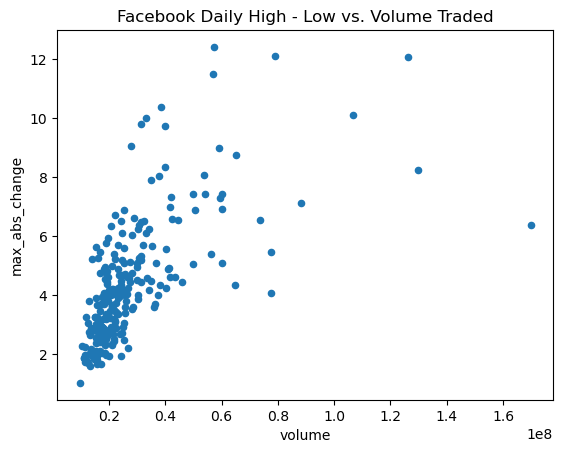

In [46]:
fb.assign(max_abs_change=fb.high - fb.low).plot(kind='scatter', x='volume', y='max_abs_change', title='Facebook Daily High - Low vs. Volume Traded')

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

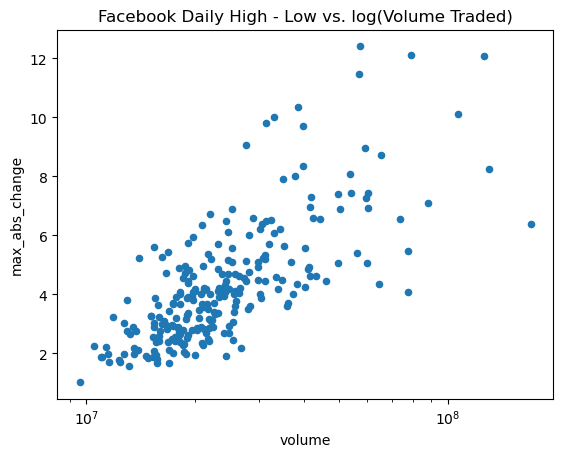

In [47]:
fb.assign(max_abs_change=fb.high - fb.low).plot(kind='scatter', x='volume', y='max_abs_change', title='Facebook Daily High - Low vs. log(Volume Traded)', logx=True)

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

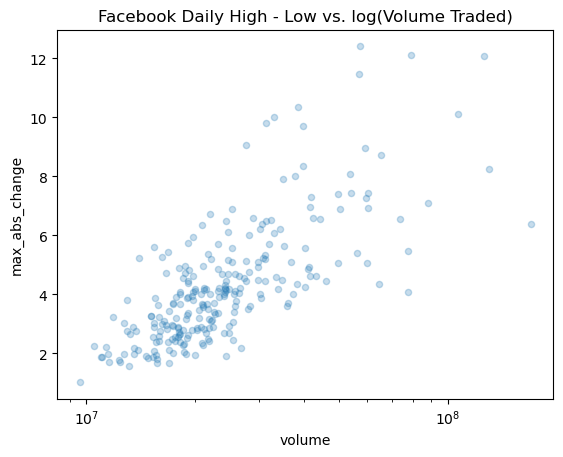

In [48]:
fb.assign(max_abs_change=fb.high - fb.low).plot(kind='scatter', x='volume', y='max_abs_change', title='Facebook Daily High - Low vs. log(Volume Traded)', logx=True, alpha=0.25)

<AxesSubplot:title={'center':'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

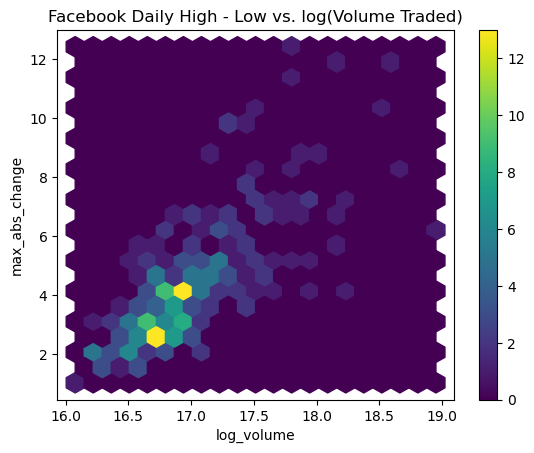

In [51]:
fb.assign(log_volume = np.log(fb.volume), max_abs_change=fb.high - fb.low).plot(kind='hexbin', x='log_volume', y='max_abs_change', title='Facebook Daily High - Low vs. log(Volume Traded)', colormap='viridis', gridsize=20, sharex=False)

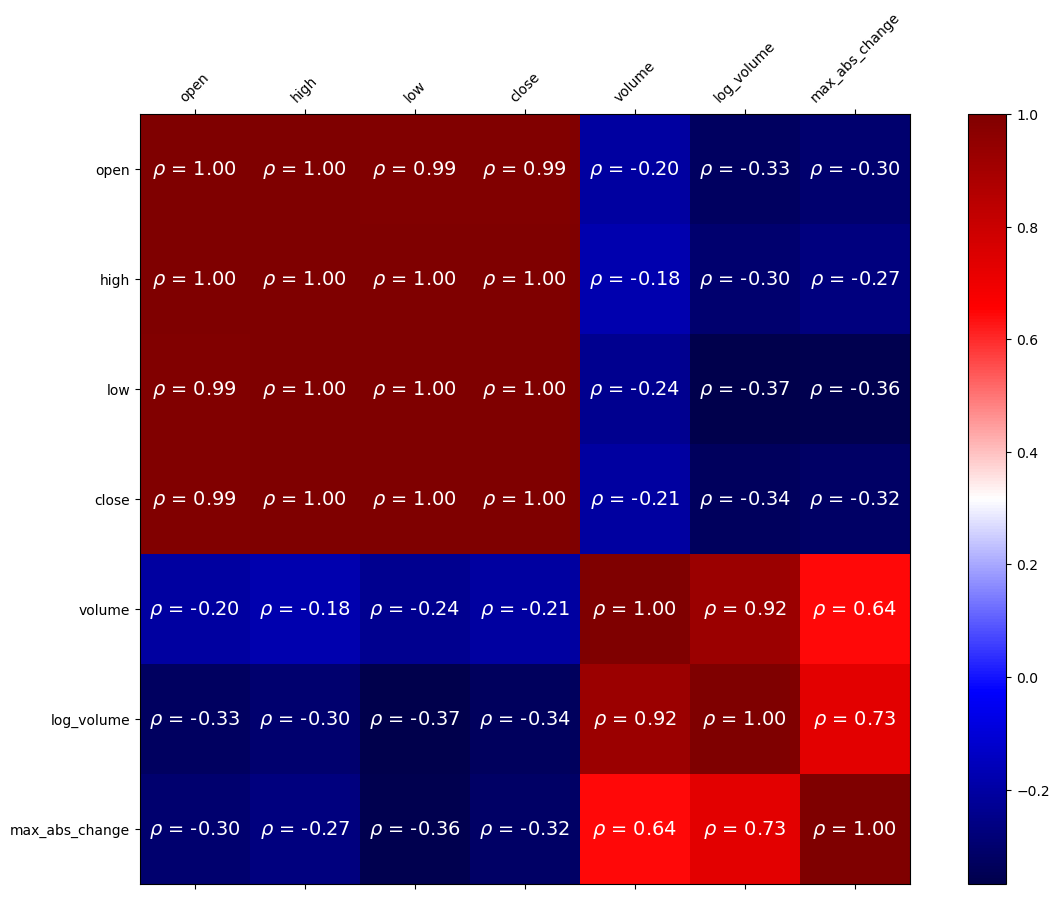

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))

fb_corr = fb.assign(log_volume=np.log(fb.volume), max_abs_change=fb.high - fb.low).corr()

im = ax.matshow(fb_corr, cmap='seismic')
fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1])
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1])
ax.set_yticklabels(labels)

for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(i, j, fr'$\rho$ = {coef:.2f}', ha='center', va='center', color='white', fontsize=14)

Text(0.5, 0, 'Volume Traded')

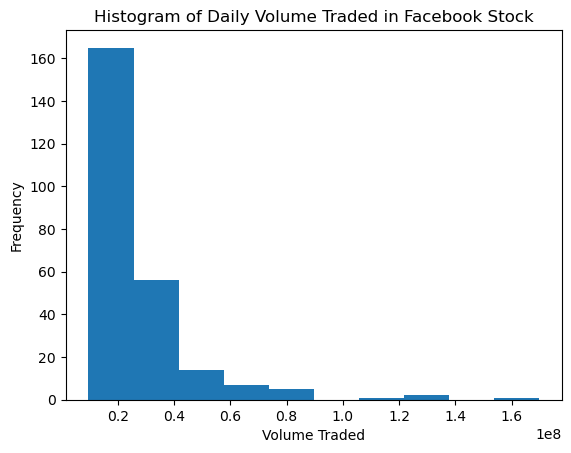

In [59]:
fb.volume.plot(kind='hist', title='Histogram of Daily Volume Traded in Facebook Stock')
plt.xlabel('Volume Traded')

Text(0.5, 0, 'magnitude')

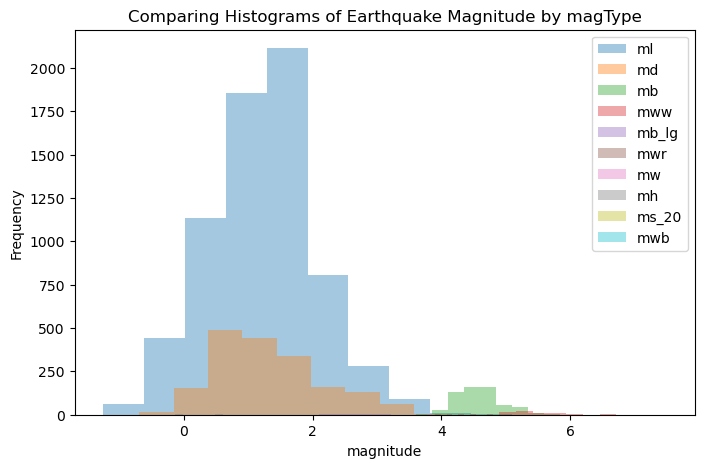

In [63]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag 
    if not data.empty:
        data.plot(kind='hist', ax=axes, alpha=0.4, label=magtype, legend=True, title="Comparing Histograms of Earthquake Magnitude by magType")

plt.xlabel('magnitude')

c:\Users\KSpicer\Anaconda3\envs\victorian_authorship_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 0, 'Price ($)')

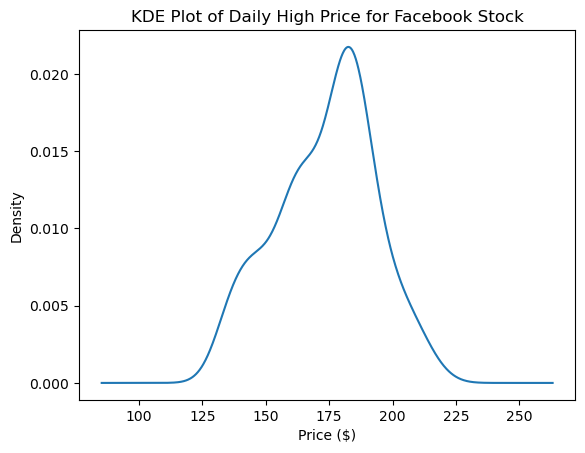

In [64]:
fb.high.plot(kind='kde', title='KDE Plot of Daily High Price for Facebook Stock')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

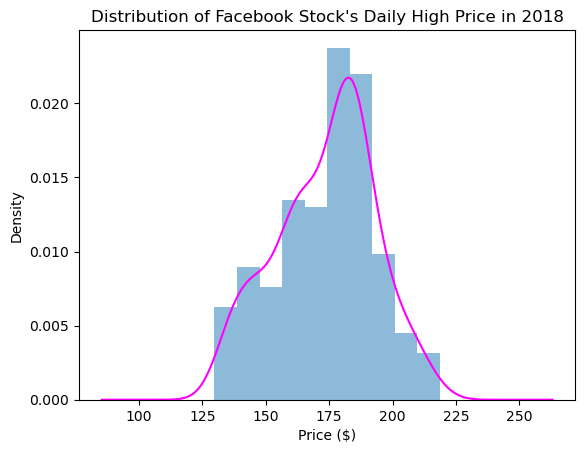

In [65]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(ax=ax, kind='kde', color='magenta', title='Distribution of Facebook Stock\'s Daily High Price in 2018')
plt.xlabel('Price ($)')

Text(0.5, 0, 'Price ($)')

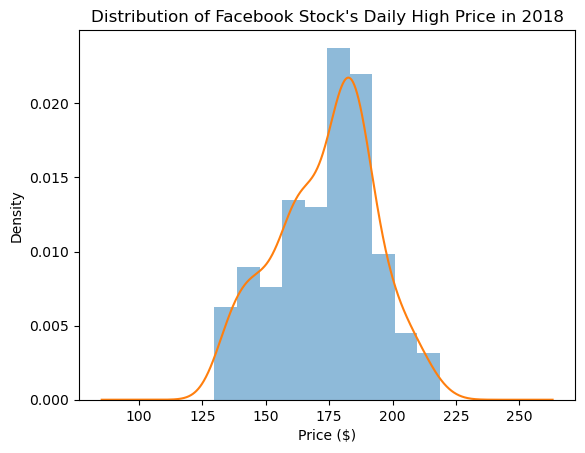

In [66]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(ax=ax, kind='kde', title='Distribution of Facebook Stock\'s Daily High Price in 2018')
plt.xlabel('Price ($)')

In [68]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

plt.xlabel('mag')
plt.ylabel('cumulative probability')
plt.title('ECDF of Earthquake Magnitude with magType ml')

ModuleNotFoundError: No module named 'statsmodels'

Text(0, 0.5, 'Price ($)')

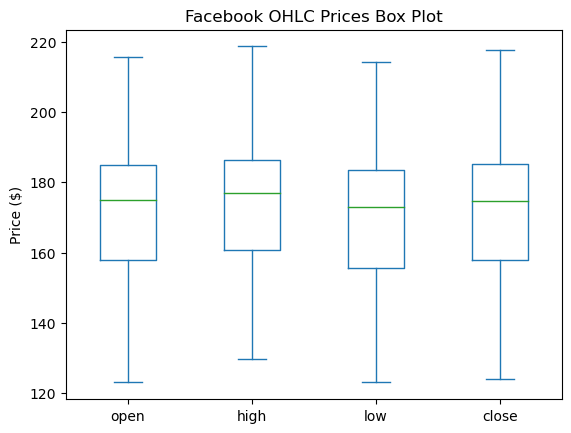

In [70]:
fb.iloc[:, :4].plot(kind='box', title="Facebook OHLC Prices Box Plot")
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

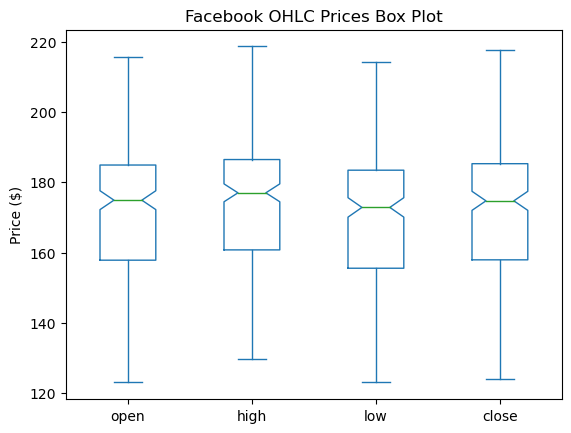

In [71]:
fb.iloc[:, :4].plot(kind='box', title="Facebook OHLC Prices Box Plot",  notch=True)
plt.ylabel('Price ($)')

Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

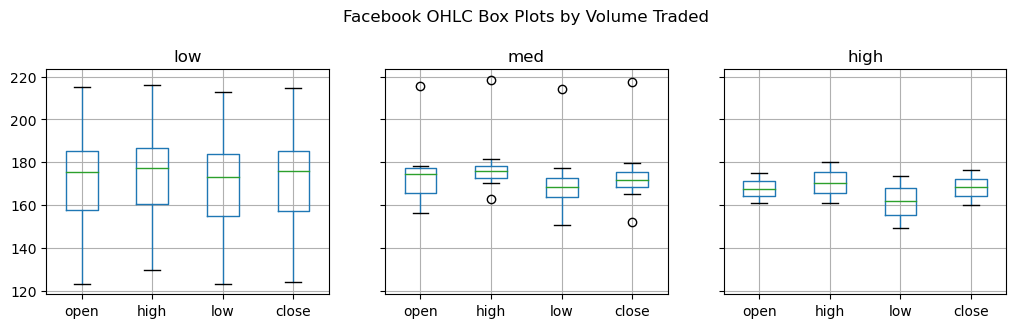

In [73]:
fb.assign(volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])).groupby('volume_bin').boxplot(column=['open', 'high', 'low', 'close'], layout=(1, 3), figsize=(12, 3))
plt.suptitle('Facebook OHLC Box Plots by Volume Traded', y=1.1)

Text(0, 0.5, 'magnitude')

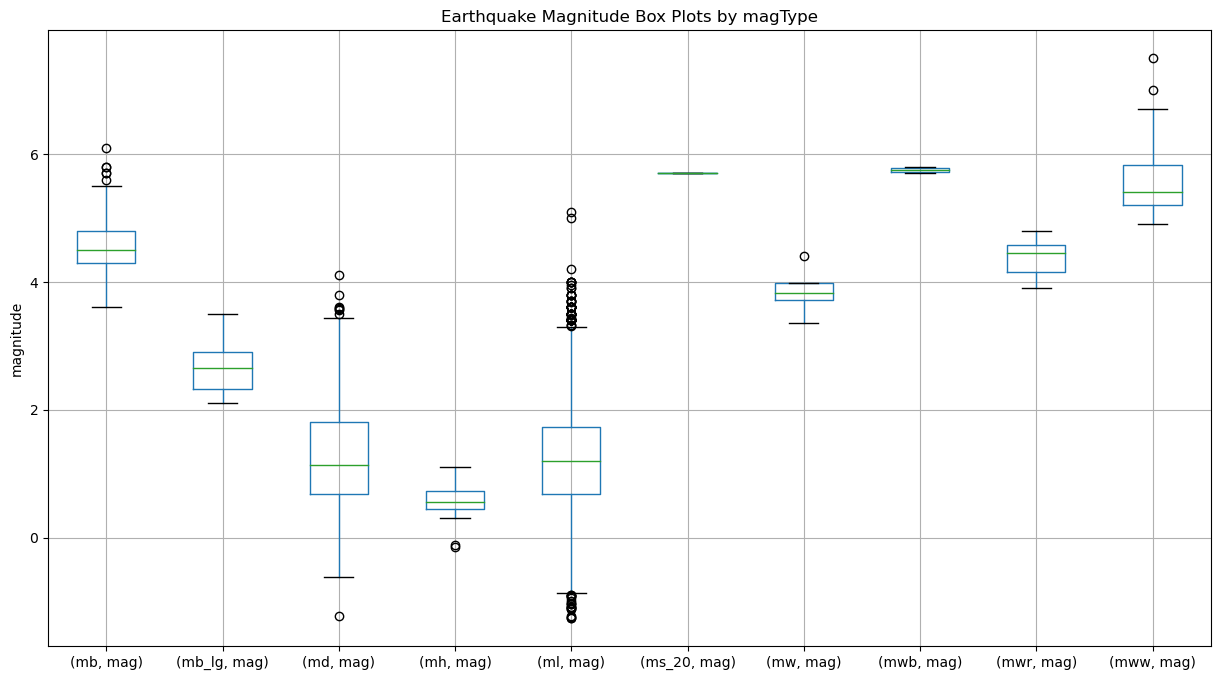

In [74]:
quakes[['mag', 'magType']].groupby('magType').boxplot(figsize=(15, 8), subplots=False)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude')

Text(0.5, 0, 'earthquakes')

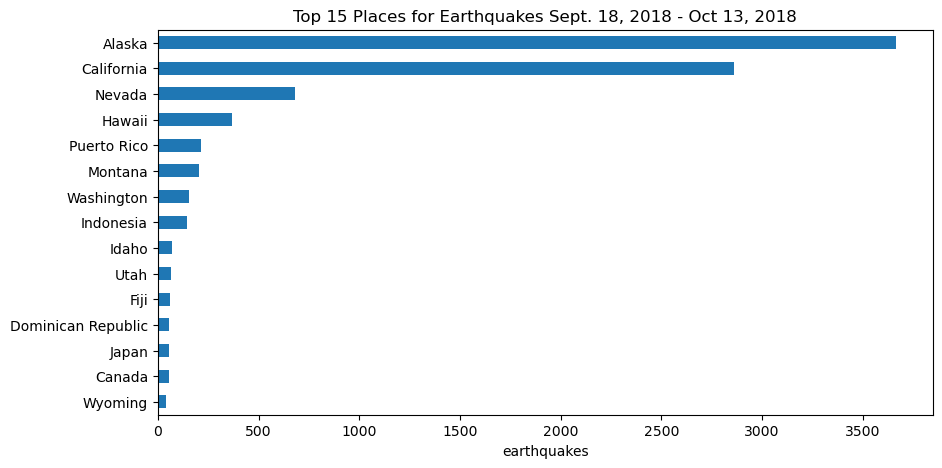

In [75]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(kind='barh', figsize=(10, 5), title='Top 15 Places for Earthquakes Sept. 18, 2018 - Oct 13, 2018')
plt.xlabel('earthquakes')

Text(0.5, 0, 'tsunamis')

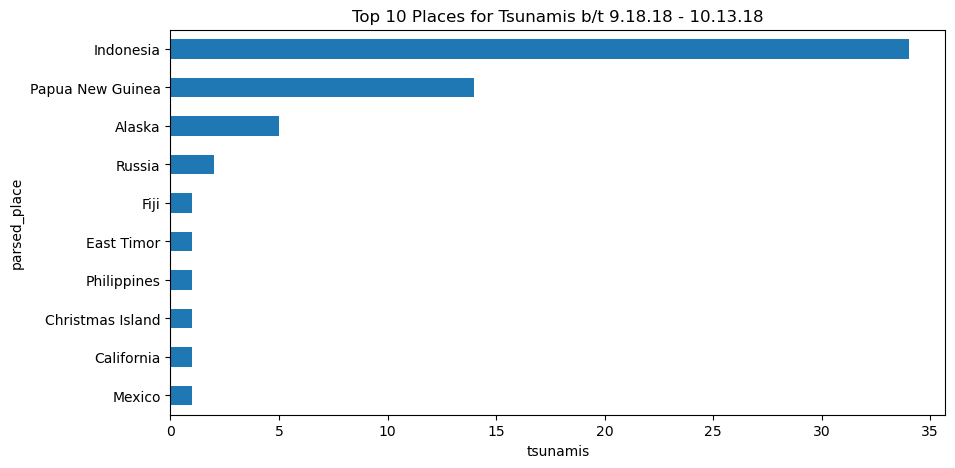

In [76]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10:,].plot(kind='barh', figsize=(10, 5), title='Top 10 Places for Tsunamis b/t 9.18.18 - 10.13.18')
plt.xlabel('tsunamis')

In [77]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(time=lambda x: pd.to_datetime(x.time, unit='ms'), earthquake=1).set_index('time').resample('1D').sum()

In [78]:
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

Text(0, 0.5, 'count')

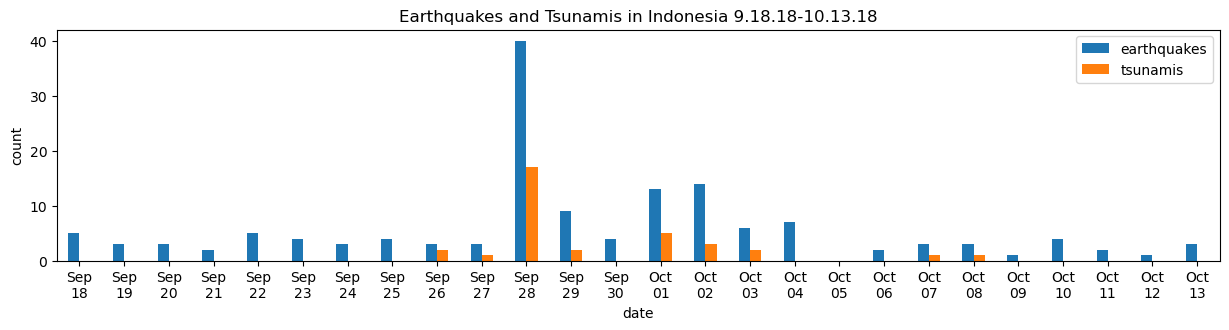

In [79]:
indonesia_quakes.plot(y=['earthquake', 'tsunami'], kind='bar', rot=0, figsize=(15, 3), label = ['earthquakes', 'tsunamis'], title='Earthquakes and Tsunamis in Indonesia 9.18.18-10.13.18')
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, '')

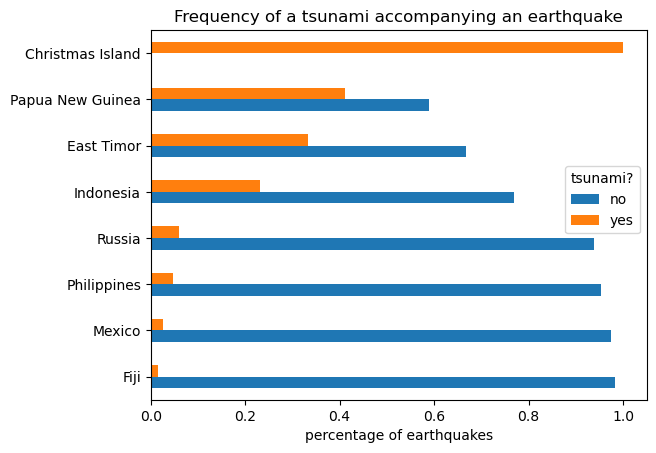

In [81]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count().unstack().apply(lambda x: x / x.sum(), axis=1).rename(columns={0: 'no', 1: 'yes'}).sort_values('yes', ascending=False)[7::-1].plot.barh(title="Frequency of a tsunami accompanying an earthquake")

plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

Text(0, 0.5, 'earthquakes')

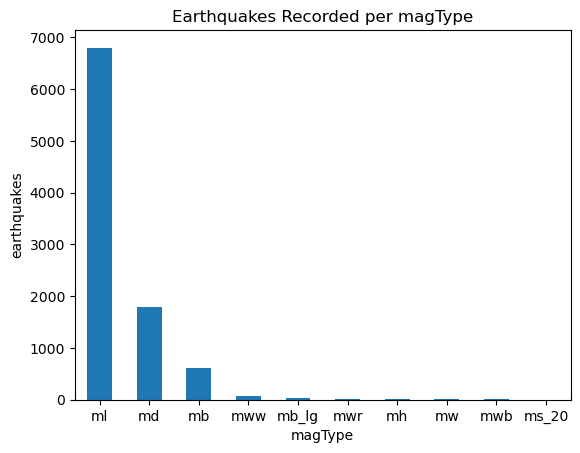

In [82]:
quakes.magType.value_counts().plot(kind='bar', rot=0, title='Earthquakes Recorded per magType')
plt.xlabel('magType')
plt.ylabel('earthquakes')

In [83]:
pivot = quakes.assign(mag_bin=lambda x: np.floor(x.mag)).pivot_table(index='mag_bin', columns='magType', values='mag', aggfunc='count')

Text(0, 0.5, 'earthquakes')

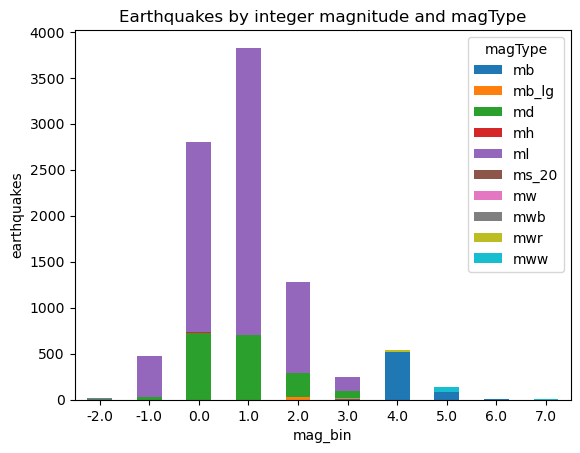

In [84]:
pivot.plot.bar(stacked=True, rot=0, title='Earthquakes by integer magnitude and magType')
plt.ylabel('earthquakes')

Text(0, 0.5, 'percentage')

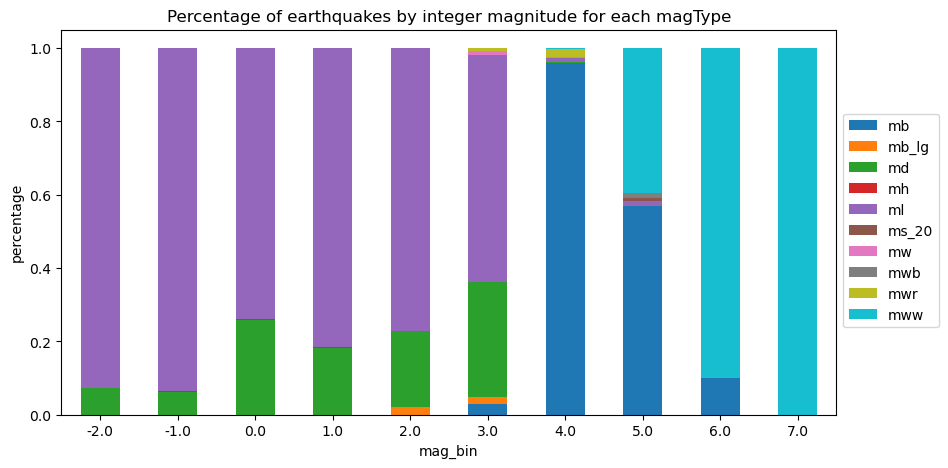

In [85]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)

ax = normalized_pivot.plot.bar(stacked=True, rot=0, figsize=(10, 5), title="Percentage of earthquakes by integer magnitude for each magType")
ax.legend(bbox_to_anchor=(1, 0.8))
plt.ylabel('percentage')

Text(0, 0.5, '')

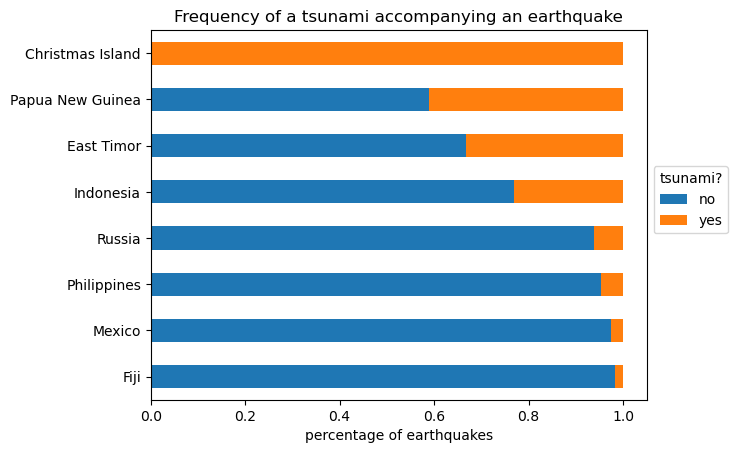

In [88]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count().unstack().apply(lambda x: x / x.sum(), axis=1).rename(columns={0: 'no', 1: 'yes'}).sort_values('yes', ascending=False)[7::-1].plot.barh(title='Frequency of a tsunami accompanying an earthquake', stacked=True)

plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))
plt.xlabel('percentage of earthquakes')
plt.ylabel('')


array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='volume', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='volume', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylabel='low'>,
        <AxesSubplot:xlabel='high', ylabel='low'>,
        <AxesSubplot:xlabel='low', ylabel='low'>,
        <AxesSubplot:xlabel='close', ylabel='low'>,
        <AxesSubplot:xlabel='volume', ylabel='low'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>,
    

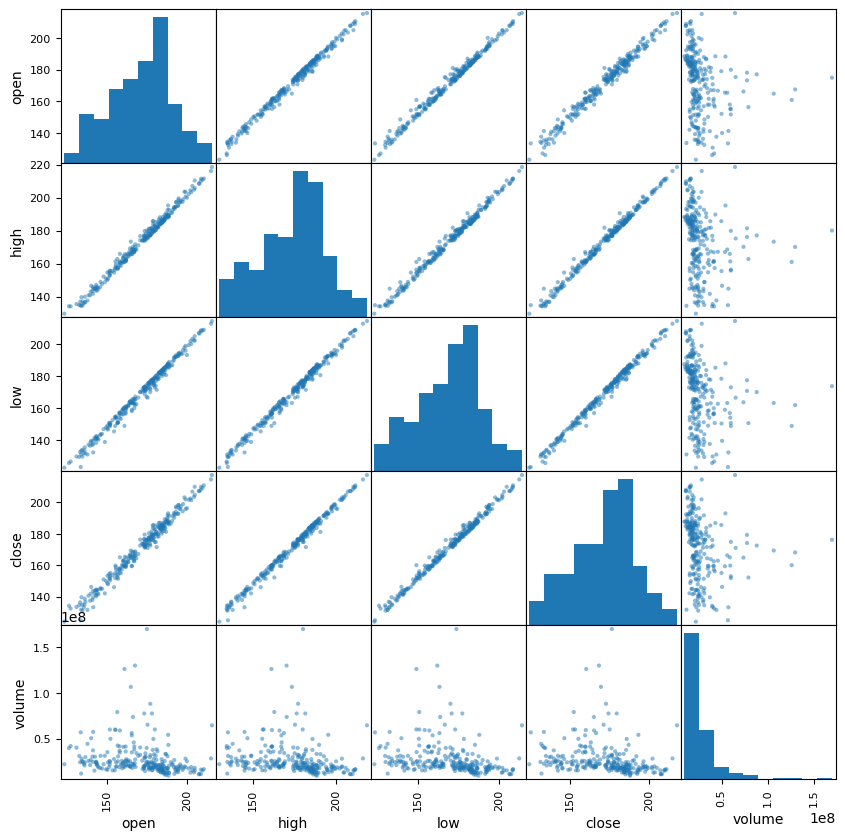

In [89]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='volume', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='volume', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylabel='low'>,
        <AxesSubplot:xlabel='high', ylabel='low'>,
        <AxesSubplot:xlabel='low', ylabel='low'>,
        <AxesSubplot:xlabel='close', ylabel='low'>,
        <AxesSubplot:xlabel='volume', ylabel='low'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>,
    

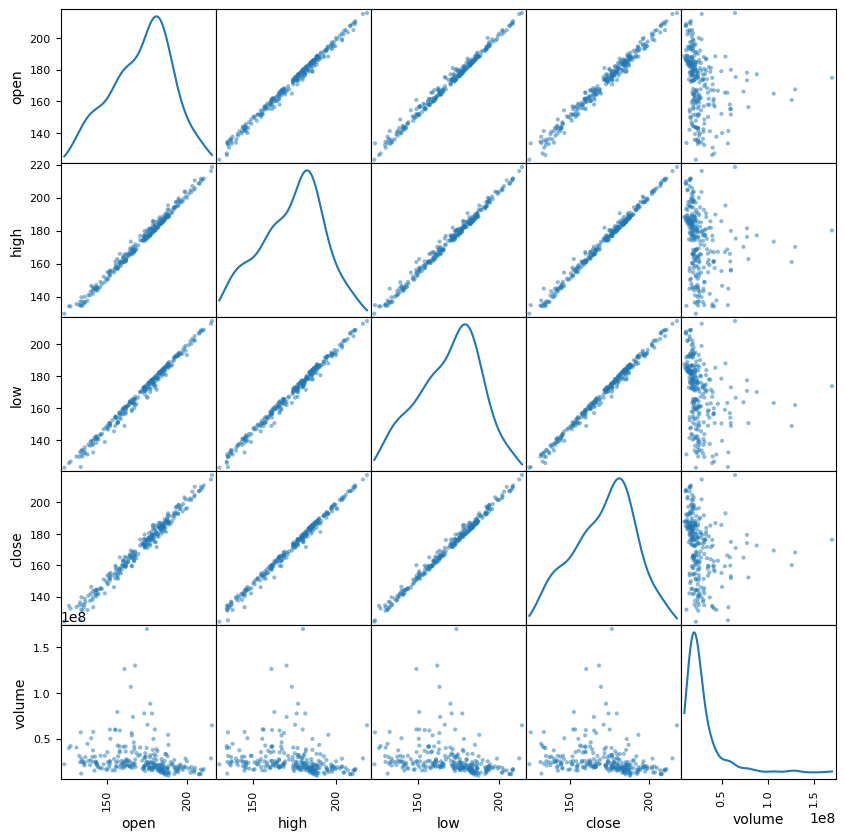

In [90]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

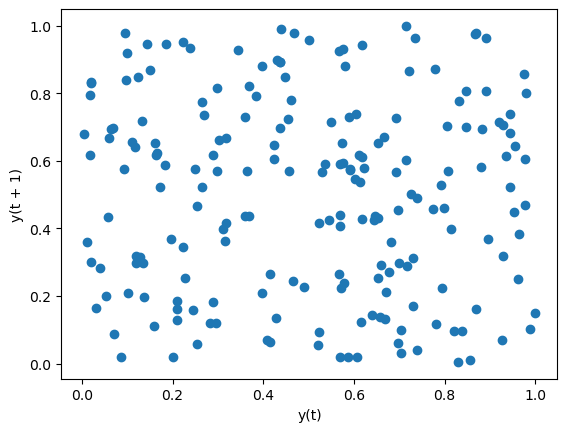

In [91]:
from pandas.plotting import lag_plot
np.random.seed(0)
lag_plot(pd.Series(np.random.random(size=200)))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

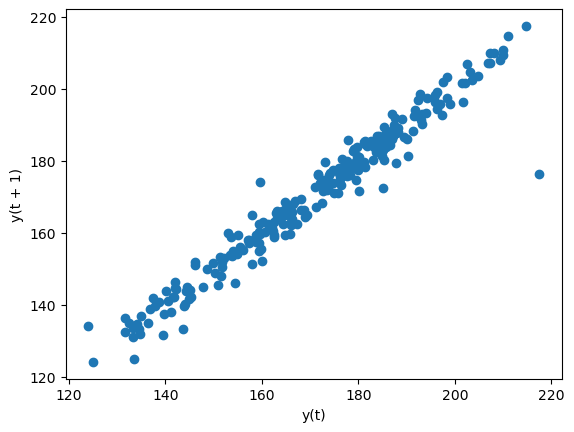

In [92]:
lag_plot(fb.close)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

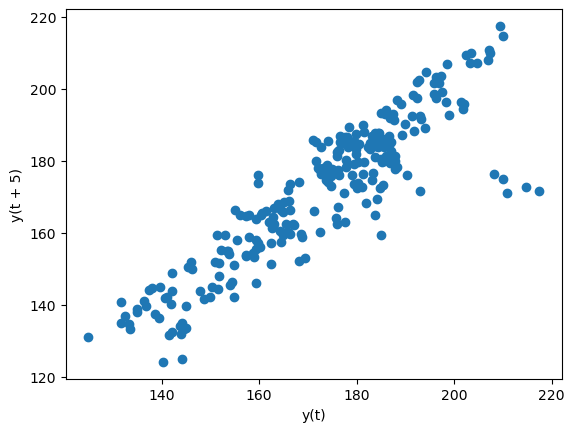

In [93]:
lag_plot(fb.close, lag=5)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

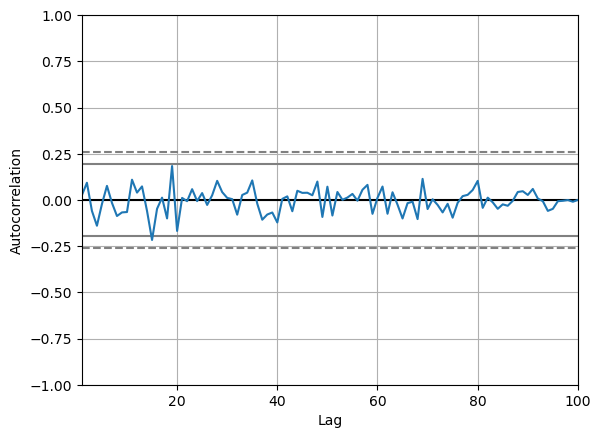

In [94]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pd.Series(np.random.random(size=100)))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

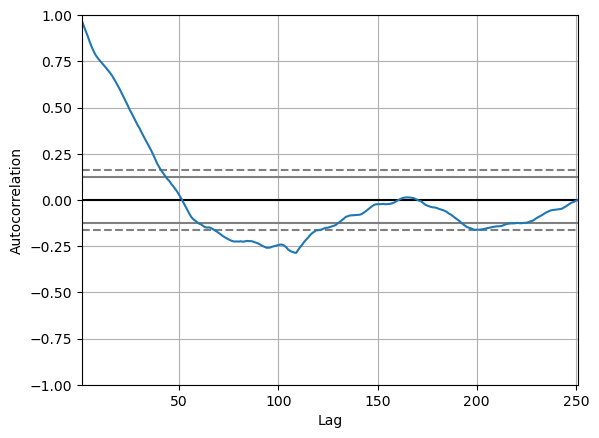

In [95]:
autocorrelation_plot(fb.close)

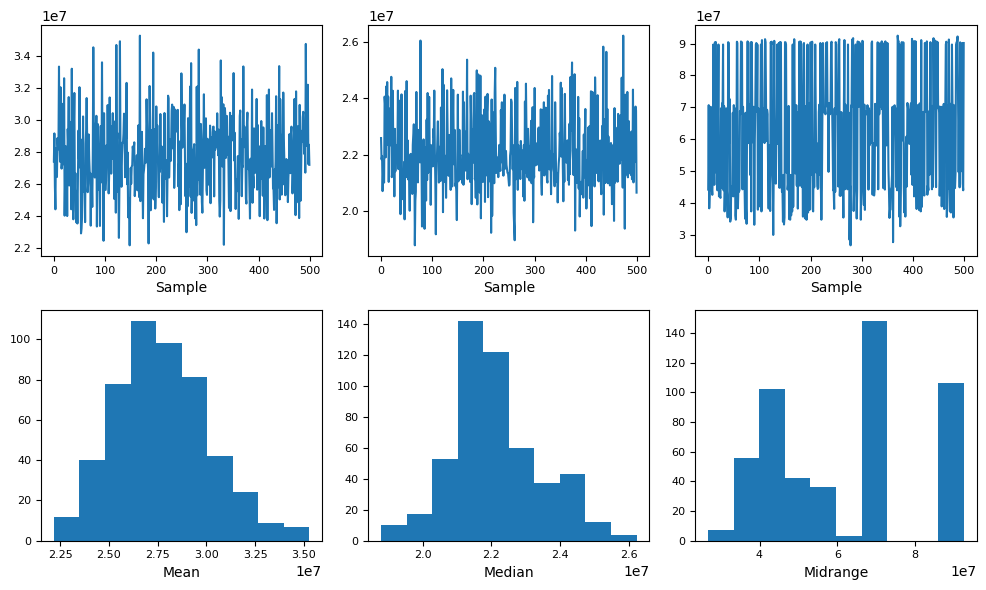

In [96]:
from pandas.plotting import bootstrap_plot

fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))